In [153]:
# Import libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay) 

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

%matplotlib inline

In [72]:
# Load the mutagenicity data
df = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/mutagenicity_kNN.csv")

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5764 non-null   int64  
 1   Id                   5764 non-null   int64  
 2   CAS                  5764 non-null   object 
 3   SMILES               5764 non-null   object 
 4   Status               5764 non-null   object 
 5   Experimental value   5764 non-null   int64  
 6   Predicted value      5764 non-null   object 
 7   NumValenceElectrons  5764 non-null   int64  
 8   qed                  5764 non-null   float64
 9   TPSA                 5764 non-null   float64
 10  MolMR                5764 non-null   float64
 11  BalabanJ             5764 non-null   float64
 12  BertzCT              5764 non-null   float64
 13  MolWt                5764 non-null   float64
 14  MolLogP              5764 non-null   float64
dtypes: float64(7), int64(4), object(4)
mem

In [74]:
df.head()

Unnamed: 0  Id       CAS                     SMILES    Status  \
0           0   1  100-00-5   O=[N+]([O-])c1ccc(cc1)Cl  Training   
1           1   2  100-01-6    O=[N+]([O-])c1ccc(N)cc1  Training   
2           2   3  100-02-7    O=[N+]([O-])c1ccc(O)cc1  Training   
3           3   4  100-11-8  O=[N+]([O-])c1ccc(cc1)CBr  Training   
4           4   5  100-12-9   O=[N+]([O-])c1ccc(cc1)CC  Training   

   Experimental value Predicted value  NumValenceElectrons       qed   TPSA  \
0                   1               1                   52  0.463602  43.14   
1                   1               1                   52  0.359544  69.16   
2                   0               1                   52  0.470728  63.37   
3                   1               0                   58  0.432586  43.14   
4                   0               0                   58  0.479785  43.14   

     MolMR  BalabanJ     BertzCT    MolWt  MolLogP  
0  38.1064  3.003401  244.429658  157.556   2.2482  
1  37.5088  3.003401  242.429658  138.126   1.1770  
2  34.7612  3.003401  241.674771  139.110   1.3004  
3  45.7274  2.913802  257.648013  216.034   2.4897  
4  42.4744  2.913802  253.299498  151.165   2.1572

In [75]:
mutagenic_data = df[df['Experimental value']==1]
mutagenic_data.info()
mutagenic_data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 0 to 5763
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3251 non-null   int64  
 1   Id                   3251 non-null   int64  
 2   CAS                  3251 non-null   object 
 3   SMILES               3251 non-null   object 
 4   Status               3251 non-null   object 
 5   Experimental value   3251 non-null   int64  
 6   Predicted value      3251 non-null   object 
 7   NumValenceElectrons  3251 non-null   int64  
 8   qed                  3251 non-null   float64
 9   TPSA                 3251 non-null   float64
 10  MolMR                3251 non-null   float64
 11  BalabanJ             3251 non-null   float64
 12  BertzCT              3251 non-null   float64
 13  MolWt                3251 non-null   float64
 14  MolLogP              3251 non-null   float64
dtypes: float64(7), int64(4), object(4)
mem

Unnamed: 0  Id       CAS                     SMILES    Status  \
0           0   1  100-00-5   O=[N+]([O-])c1ccc(cc1)Cl  Training   
1           1   2  100-01-6    O=[N+]([O-])c1ccc(N)cc1  Training   
3           3   4  100-11-8  O=[N+]([O-])c1ccc(cc1)CBr  Training   
6           6   7  100-13-0  O=[N+]([O-])c1ccc(C=C)cc1  Training   
7           7   8  100-14-1  O=[N+]([O-])c1ccc(cc1)CCl  Training   

   Experimental value Predicted value  NumValenceElectrons       qed   TPSA  \
0                   1               1                   52  0.463602  43.14   
1                   1               1                   52  0.359544  69.16   
3                   1               0                   58  0.432586  43.14   
6                   1               0                   56  0.477660  43.14   
7                   1               1                   58  0.389482  43.14   

     MolMR  BalabanJ     BertzCT    MolWt  MolLogP  
0  38.1064  3.003401  244.429658  157.556   2.2482  
1  37.5088  3.003401  242.429658  138.126   1.1770  
3  45.7274  2.913802  257.648013  216.034   2.4897  
6  43.1874  3.000887  276.648462  149.149   2.2378  
7  42.6534  2.913802  257.648013  171.583   2.3336

In [76]:
# Identify the non-predicted molecules from VEGA model
df[df['Predicted value'] == 'Non Predicted']

Unnamed: 0    Id         CAS            SMILES    Status  \
1844        1844  1846  16709-86-7  C=C[Si](C)(C)CCl  Training   
2194        2194  2197   2179-59-1         C=CCSSCCC  Training   
4118        4118  4125    624-92-0              CSSC  Training   
4180        4180  4187   6317-18-6         N#CSCSC#N  Training   
5633        5633  5641   7783-54-2            FN(F)F  Training   
5655        5655  5663    676-83-5          CP(Cl)Cl  Training   

      Experimental value Predicted value  NumValenceElectrons       qed  \
1844                   0   Non Predicted                   42  0.401439   
2194                   0   Non Predicted                   48  0.333839   
4118                   0   Non Predicted                   26  0.452840   
4180                   0   Non Predicted                   36  0.321595   
5633                   1   Non Predicted                   26  0.383980   
5655                   1   Non Predicted                   26  0.426990   

       TPSA   MolMR  BalabanJ    BertzCT    MolWt  MolLogP  
1844   0.00  38.399  3.575471  68.480406  134.682  2.19800  
2194   0.00  45.404  2.616293  52.490225  148.296  2.96380  
4118   0.00  27.030  1.974745   6.000000   94.204  1.62740  
4180  47.58  31.275  2.768386  95.083765  130.197  1.37246  
5633   3.24   5.163  2.323790   8.000000   71.001  0.94190  
5655   0.00  24.550  2.323790  10.754888  116.915  2.40570

In [77]:
# Remove the non-predicted molecules from VEGA model
non_predicted_index = df.loc[df['Predicted value'] == 'Non Predicted'].index
df.drop(non_predicted_index, inplace=True)

In [78]:
# Remove the columns that are not needed for the model
X = df.drop(['Unnamed: 0', 'Id','CAS','SMILES','Status','Experimental value','Predicted value'],axis=1)

In [142]:
X.head()

NumValenceElectrons       qed   TPSA    MolMR  BalabanJ     BertzCT  \
0                   52  0.463602  43.14  38.1064  3.003401  244.429658   
1                   52  0.359544  69.16  37.5088  3.003401  242.429658   
2                   52  0.470728  63.37  34.7612  3.003401  241.674771   
3                   58  0.432586  43.14  45.7274  2.913802  257.648013   
4                   58  0.479785  43.14  42.4744  2.913802  253.299498   

     MolWt  MolLogP  
0  157.556   2.2482  
1  138.126   1.1770  
2  139.110   1.3004  
3  216.034   2.4897  
4  151.165   2.1572

In [98]:
# Print the number of molecules with QED score less than 0.5
print((df['qed'] < 0.5).sum())
# Print the molecule with the maximum molecular weight
max_mw_mol = df[df['MolWt'] == df['MolWt'].max()][['SMILES','MolWt','CAS']]
# Print the mean number of valence electrons
print(df['NumValenceElectrons'].mean())

2672
87.03108718304966


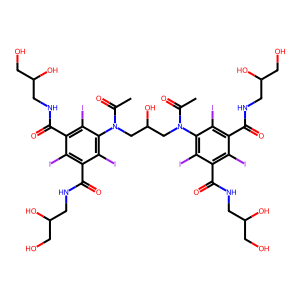

In [99]:
# Plot the molecule with the maximum molecular weight
from rdkit import Chem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles(max_mw_mol.SMILES.values[0])
Draw.MolToImage(mol)

In [111]:
# Print the percentage of mutagenic and non-mutagenic molecules
y = df['Experimental value'].to_numpy()
perc_mutegenic = y.sum()/len(y)*100
perc_non_mutegenic = (1-y.sum()/len(y))*100
print(f"Percentage of mutagenic molecules: {perc_mutegenic:.2f}%")
print(f"Percentage of non-mutagenic molecules: {perc_non_mutegenic:.2f}%")

Percentage of mutagenic molecules: 56.43%
Percentage of non-mutagenic molecules: 43.57%


In [113]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Print the number of points in the training and test sets
print('Training points: ', len(y_train))
print('Training points: ', len(y_test))

Training points:  4606
Training points:  1152


In [125]:
# Training set mutagenic and non-mutagenic percentages
perc_mutegenic_train = y_train.sum()/len(y_train)*100
perc_non_mutegenic_train = (1-y_train.sum()/len(y_train))*100
print(f"Percentage of mutagenic molecules in training set: {perc_mutegenic_train:.2f}%")
print(f"Percentage of non-mutagenic molecules in training set: {perc_non_mutegenic_train:.2f}%")

# Test set mutagenic and non-mutagenic percentages
perc_mutegenic_test = y_test.sum()/len(y_test)*100
perc_non_mutegenic_test = (1-y_test.sum()/len(y_test))*100
print(f"Percentage of mutagenic molecules in test set: {perc_mutegenic_test:.2f}%")
print(f"Percentage of non-mutagenic molecules in test set: {perc_non_mutegenic_test:.2f}%")

Percentage of mutagenic molecules in training set: 56.49%
Percentage of non-mutagenic molecules in training set: 43.51%
Percentage of mutagenic molecules in test set: 56.16%
Percentage of non-mutagenic molecules in test set: 43.84%


In [127]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
# Access the mean and scale (standard deviation)
print("Mean:", scaler.mean_)
print("Scale (Standard Deviation):", scaler.scale_)

Mean: [8.69316109e+01 5.13313133e-01 5.37819865e+01 6.50006326e+01
 2.57335938e+00 5.19609141e+02 2.41009603e+02 2.58334080e+00]
Scale (Standard Deviation): [4.28636962e+01 1.65842658e-01 4.27975447e+01 3.09791840e+01
 6.41593230e-01 3.80391943e+02 1.16222142e+02 1.91901383e+00]


In [132]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [133]:
y_pred = knn.predict(X_test)

c:\Users\Suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


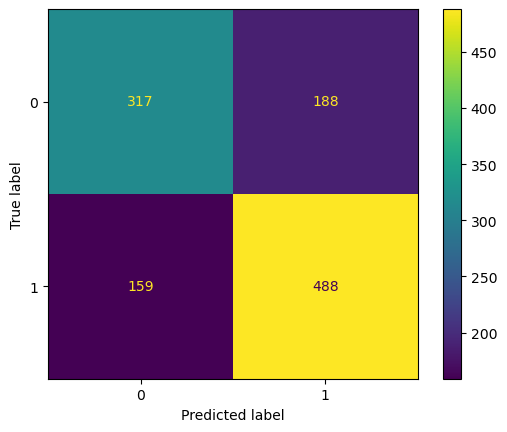

In [136]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()       
plt.show()

In [137]:
print('{:<10} {:<10}'.format("Accuracy:", accuracy_score(y_test, y_pred)))
print('{:<10} {:<10}'.format("Precision:", precision_score(y_test, y_pred)))
print('{:<10} {:<10}'.format("Recall:", recall_score(y_test, y_pred)))
print('{:<10} {:<10}'.format("F1 Score:", f1_score(y_test, y_pred)))
print('{:<10} {:<10}'.format("ROC AUC Score:", roc_auc_score(y_test, y_pred)))

Accuracy:  0.6987847222222222
Precision: 0.7218934911242604
Recall:    0.7542503863987635
F1 Score:  0.7377173091458805
ROC AUC Score: 0.6909865793379956


Accuracy:   0.7999305314345259
Precision:  0.8168631006346329
Recall:     0.8319482917820868
F1:         0.8243366880146386


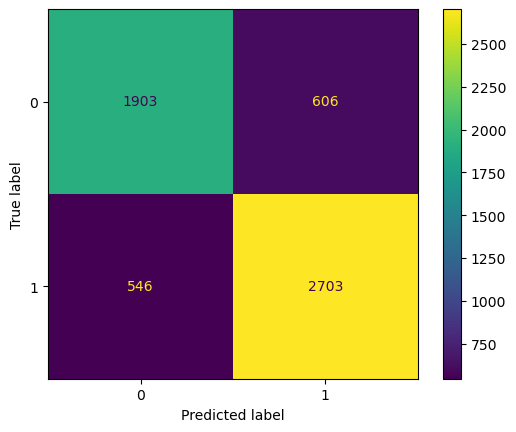

In [138]:
# VEGA model

y_clean = df['Experimental value'].astype(int)
y_vega_clean = df['Predicted value'].astype(int)

cm = confusion_matrix(y_clean, y_vega_clean)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print('{:<10}  {:<15}'.format('Accuracy:', accuracy_score(y_clean, y_vega_clean)))
print('{:<10}  {:<15}'.format('Precision:', precision_score(y_clean, y_vega_clean)))
print('{:<10}  {:<15}'.format('Recall:', recall_score(y_clean, y_vega_clean)))
print('{:<10}  {:<15}'.format('F1:', f1_score(y_clean, y_vega_clean)))

In [140]:
# Leave one out cross validation
X_clean = df.drop(['Unnamed: 0', 'Id','CAS','SMILES','Status','Experimental value','Predicted value'],axis=1)

loo = LeaveOneOut()
print('Number of folds: ', loo.get_n_splits(X_clean))

Number of folds:  5758


In [169]:
y_pred_loo_my_model = np.zeros(y_clean.shape[0])
for i, (train_index, test_index) in enumerate(loo.split(X_clean)):
  # Get training data for the current fold
  X_train_loo = X_clean.iloc[train_index]
  y_train_loo = y_clean.iloc[train_index]

  # Get test data for the current fold
  X_test_loo = X_clean.iloc[test_index]

  # Train kNN
  scaler = StandardScaler()
  X_train_loo = scaler.fit_transform(X_train_loo)
  X_test_loo = scaler.transform(X_test_loo)

  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train_loo, y_train_loo)

  # Get prediction on the test molecule
  y_pred_loo = knn.predict(X_test_loo)

  # Store the prediction in `y_pred_loo_my_model`
  y_pred_loo_my_model[test_index] = y_pred_loo

c:\Users\Suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy:   0.7110107676276485
Precision:  0.7309822209268435
Recall:     0.7719298245614035
F1:         0.7508982035928143


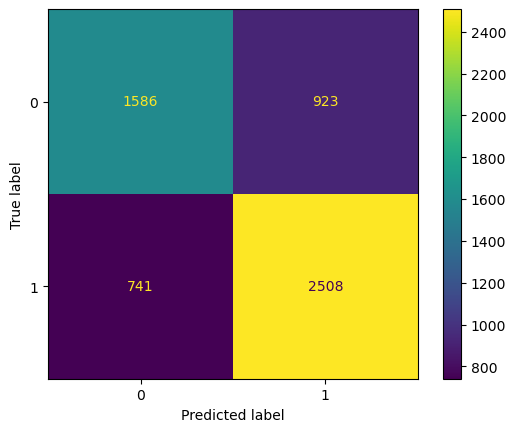

In [170]:
cm = confusion_matrix(y_clean, y_pred_loo_my_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print('{:<10}  {:<15}'.format('Accuracy:', accuracy_score(y_clean, y_pred_loo_my_model)))
print('{:<10}  {:<15}'.format('Precision:', precision_score(y_clean, y_pred_loo_my_model)))
print('{:<10}  {:<15}'.format('Recall:', recall_score(y_clean, y_pred_loo_my_model)))
print('{:<10}  {:<15}'.format('F1:', f1_score(y_clean, y_pred_loo_my_model)))


# Finding the best k in kNN

In [148]:
# Finding the best k in kNN
import numpy as np
from tqdm.notebook import tqdm

num_ks = np.arange(1, 100, 2).astype(int)

X_train_hyp, X_valid, y_train_hyp, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

train_accuracy = []
valid_accuracy = []

for i in tqdm(range(len(num_ks))):
  knn = KNeighborsClassifier(n_neighbors=num_ks[i])
  knn.fit(X_train_hyp, y_train_hyp)

  pred_train = knn.predict(X_train_hyp)
  pred_valid  = knn.predict(X_valid)

  train_accuracy.append(1-accuracy_score(y_train_hyp, pred_train))
  valid_accuracy.append(1-accuracy_score(y_valid, pred_valid))

  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\Suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

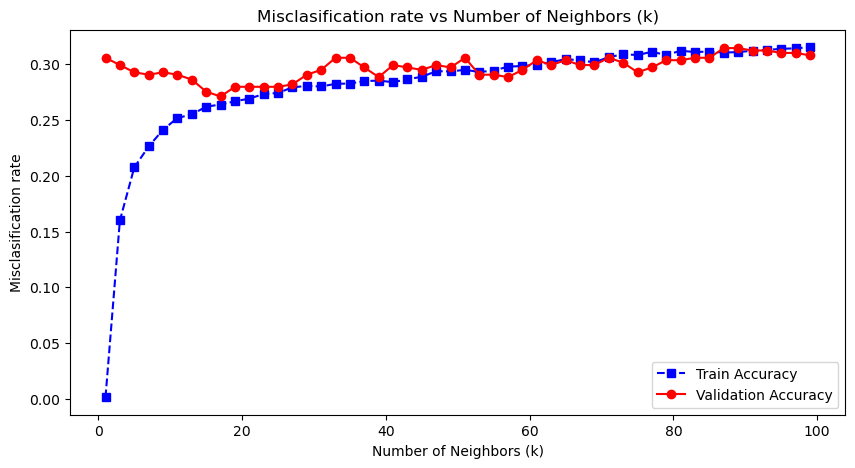

In [151]:
plt.figure(figsize=(10, 5))
plt.plot(num_ks, train_accuracy, 'bs--', label='Train Accuracy')
plt.plot(num_ks, valid_accuracy, 'ro-', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclasification rate')
plt.title('Misclasification rate vs Number of Neighbors (k)')
plt.legend()
plt.show()

In [155]:
num_ks = np.arange(1, 50, 1).astype(int)

train_missclass_rate = []
valid_missclass_rate = []

for i in tqdm(range(len(num_ks))):
  knn = KNeighborsClassifier(n_neighbors=num_ks[i])
  cv_dict = cross_validate(knn, X_train, y_train, cv=10, 
                                 scoring='accuracy', return_train_score=True)
  k_fold_train_score = cv_dict['train_score']
  k_fold_valid_score = cv_dict['test_score']

  train_missclass_rate.append(1-k_fold_train_score.mean())
  valid_missclass_rate.append(1-k_fold_valid_score.mean())

  0%|          | 0/49 [00:00<?, ?it/s]

c:\Users\Suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

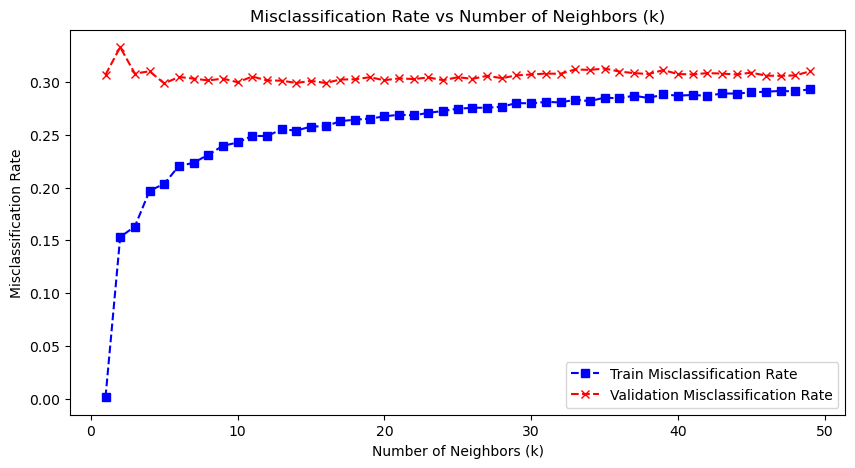

In [163]:
plt.figure(figsize=(10, 5))
plt.plot(num_ks, train_missclass_rate, 'bs--', label='Train Misclassification Rate')
plt.plot(num_ks, valid_missclass_rate, 'rx--', label='Validation Misclassification Rate')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs Number of Neighbors (k)')
plt.legend()
plt.show()

In [164]:
print(f"Best k: {num_ks[np.argmin(valid_missclass_rate)]}")

Best k: 5


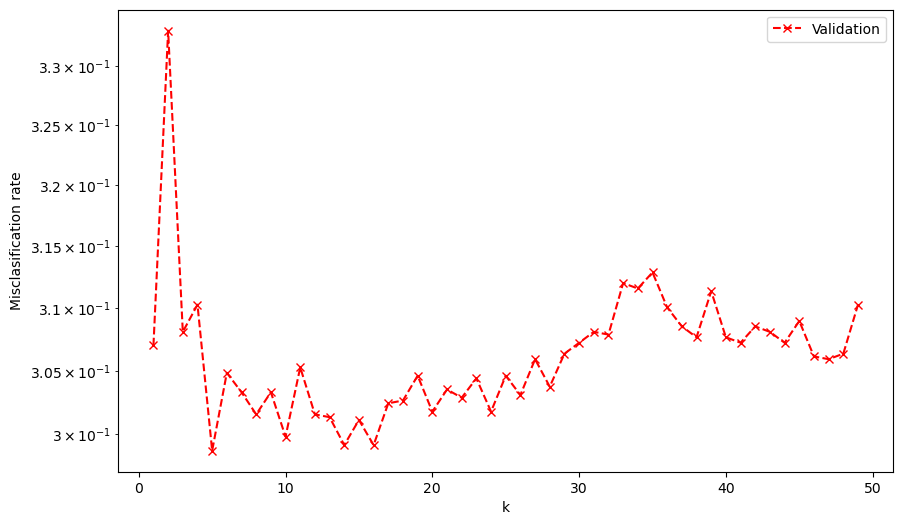

In [166]:
plt.figure(figsize=(10,6))
plt.plot(num_ks, valid_missclass_rate, 'rx--', label='Validation')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Misclasification rate')
plt.legend()
plt.show()